In [29]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [30]:
import csv, sqlite3

In [40]:
con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
import pandas as pd

In [43]:
%sql sqlite:///socioeconomic.db

'Connected: @socioeconomic.db'

In [44]:
df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data",con,if_exists="replace",index=False,method="multi" )
df

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0


In [46]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [48]:
%sql select count(*) as numbr_of_rows from chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


numbr_of_rows
78


In [50]:
%sql select * from chicago_socioeconomic_data where hardship_index > 50;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
14.0,Albany Park,11.3,19.2,10.0,32.9,32.0,21323,53.0
19.0,Belmont Cragin,10.8,18.7,14.6,37.3,37.3,15461,70.0
20.0,Hermosa,6.9,20.5,13.1,41.6,36.4,15089,71.0
23.0,Humboldt park,14.8,33.9,17.3,35.4,38.0,13781,85.0
25.0,Austin,6.3,28.6,22.6,24.4,37.9,15957,73.0
26.0,West Garfield Park,9.4,41.7,25.8,24.5,43.6,10934,92.0
27.0,East Garfield Park,8.2,42.4,19.6,21.3,43.2,12961,83.0
29.0,North Lawndale,7.4,43.1,21.2,27.6,42.7,12034,87.0
30.0,South Lawndale,15.2,30.7,15.8,54.8,33.8,10402,96.0
31.0,Lower West Side,9.6,25.8,15.8,40.7,32.6,16444,76.0


In [53]:
%sql select max(hardship_index) as hardship_index from chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


hardship_index
98.0


In [57]:
%sql select community_area_name,hardship_index from chicago_socioeconomic_data where hardship_index in (select max(hardship_index) from chicago_socioeconomic_data)

 * sqlite:///socioeconomic.db
Done.


community_area_name,hardship_index
Riverdale,98.0


In [59]:
%sql select community_area_name,per_capita_income_ from chicago_socioeconomic_data where per_capita_income_ > 60000

 * sqlite:///socioeconomic.db
Done.


community_area_name,per_capita_income_
Lake View,60058
Lincoln Park,71551
Near North Side,88669
Loop,65526


In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [65]:
income_vs_hardship = %sql select per_capita_income_, hardship_index from chicago_socioeconomic_data
income_vs_hardship

 * sqlite:///socioeconomic.db
Done.


per_capita_income_,hardship_index
23939,39.0
23040,46.0
35787,20.0
37524,17.0
57123,6.0
60058,5.0
71551,2.0
88669,1.0
40959,8.0
32875,21.0


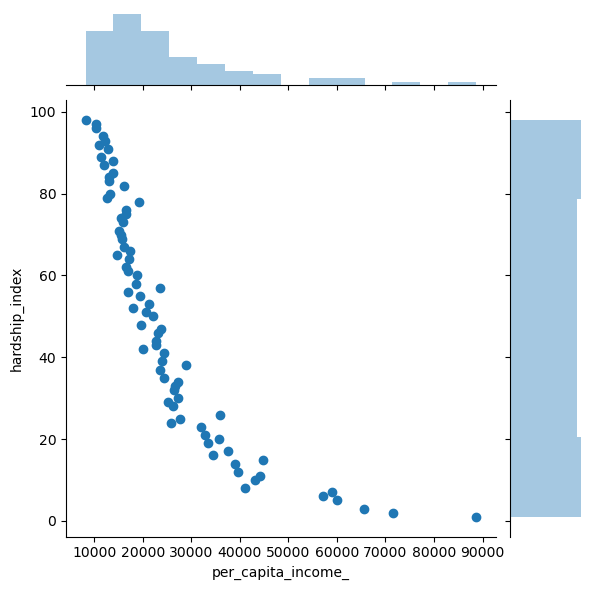

In [68]:
plot = sns.jointplot(x="per_capita_income_",y="hardship_index", data=income_vs_hardship.DataFrame())